In [2]:
# hourly data for potential uses.

import yfinance as yf

# gme = yf.Ticker("GME")
# gme.history(period="5mo", interval="1h")

In [2]:
# computer percentage change of stock price.

import pandas as pd
import numpy as np
from collections import OrderedDict

df = pd.read_csv('gme_stock_prices.csv')

price_changes = [4.81] # Dec 1

# price change = (cur - prev) * 100 / prev
prev = df['Adj Close'][0]
for cur in df['Adj Close'][1:]:
    change = round((cur - prev) * 100 / prev, 2)
    prev = cur
    price_changes.append(change)

df['change'] = price_changes

df = df.iloc[21:]

change_dict = OrderedDict()

change_dict['101'] = -4.82

for index, row in df.iterrows():
    dates = row['Date'].split('-')
    month = int(dates[1])
    day = int(dates[2])
    date_formatted = str(month)
    date_formatted += str(day).zfill(2)
    if date_formatted not in change_dict:
        change_dict[date_formatted] = row[-1]

print(change_dict)


OrderedDict([('101', -4.82), ('1231', -2.18), ('104', -8.44), ('105', 0.7), ('106', 5.7), ('107', -1.53), ('108', -2.16), ('111', 12.72), ('112', 0.05), ('113', 57.39), ('114', 27.1), ('115', -11.05), ('119', 10.87), ('120', -0.61), ('121', 9.99), ('122', 51.08), ('125', 18.12), ('126', 92.71), ('127', 134.84), ('128', -44.29), ('129', 67.87), ('201', -30.77), ('202', -60.0), ('203', 2.68), ('204', -42.11), ('205', 19.2), ('208', -5.91), ('209', -16.15), ('210', 1.77), ('211', -0.2), ('212', 2.54), ('216', -5.52), ('217', -7.21), ('218', -11.43), ('219', -0.25), ('222', 13.33), ('223', -2.24), ('224', 103.94), ('225', 18.56), ('226', -6.43), ('301', 18.34), ('302', -1.84), ('303', 5.08), ('304', 6.58), ('305', 4.07), ('308', 41.21), ('309', 26.94), ('310', 7.33), ('311', -1.89), ('312', 1.73), ('315', -16.77), ('316', -5.44), ('317', 0.79), ('318', -3.84), ('319', -0.73), ('322', -2.89), ('323', -6.55), ('324', -33.79), ('325', 52.69), ('326', -1.5), ('329', 0.17), ('330', 7.26), ('331

In [3]:
# fill in the change percentage for non-trading days. 

month_dict = { '1':31, '2':28, '3':31, '4':30 }

for k, v in month_dict.items():
    for day in range(1, v + 1):
        date = int(k) * 100 + day
        cur_date = str(date)
        count = 31
        while str(date) not in change_dict and count > 0:
            date -= 1
            count -= 1
        if str(cur_date) not in change_dict:
            change_dict[cur_date] = change_dict[str(date)]

print(change_dict)

OrderedDict([('101', -4.82), ('1231', -2.18), ('104', -8.44), ('105', 0.7), ('106', 5.7), ('107', -1.53), ('108', -2.16), ('111', 12.72), ('112', 0.05), ('113', 57.39), ('114', 27.1), ('115', -11.05), ('119', 10.87), ('120', -0.61), ('121', 9.99), ('122', 51.08), ('125', 18.12), ('126', 92.71), ('127', 134.84), ('128', -44.29), ('129', 67.87), ('201', -30.77), ('202', -60.0), ('203', 2.68), ('204', -42.11), ('205', 19.2), ('208', -5.91), ('209', -16.15), ('210', 1.77), ('211', -0.2), ('212', 2.54), ('216', -5.52), ('217', -7.21), ('218', -11.43), ('219', -0.25), ('222', 13.33), ('223', -2.24), ('224', 103.94), ('225', 18.56), ('226', -6.43), ('301', 18.34), ('302', -1.84), ('303', 5.08), ('304', 6.58), ('305', 4.07), ('308', 41.21), ('309', 26.94), ('310', 7.33), ('311', -1.89), ('312', 1.73), ('315', -16.77), ('316', -5.44), ('317', 0.79), ('318', -3.84), ('319', -0.73), ('322', -2.89), ('323', -6.55), ('324', -33.79), ('325', 52.69), ('326', -1.5), ('329', 0.17), ('330', 7.26), ('331

In [59]:
# complete the data. Using the percentage obtained above as label

import json
from os import walk
import collections
from collections import OrderedDict

data = OrderedDict({'date':[], 'sentiment':[], 'upvote_ratio':[], 'total_awards_received':[], 'score':[], 'num_comments':[], 'change_pct':[], 'change':[]})

def processData(filename, ticker):
    name = "final_data/data/"+filename
    file = json.load(open(name))
    for date, value in file.items():
        if date == '501':
            continue
        for stock, reddits in value.items():
            # print("sentiment, upvote_ratio, total_awards_received, score, num_comments, link_flair_text")
            if stock != ticker:
                continue
            for post in reddits:
                # print(post)
                if "Loss" in post[-1]:
                    post[0] -= 1
                elif "Gain" in post[-1]:
                    post[0] += 1
                data['date'].append(int(date))
                data['sentiment'].append(float(post[0]))
                data['upvote_ratio'].append(float(post[1]))
                data['total_awards_received'].append(float(post[2]))
                data['score'].append(float(post[3]))
                data['num_comments'].append(float(post[4]))
#                 if date in change_dict:
#                     print("date is: " + date + ", pct is " + change_dict[date])
#                     data['change_pct'].append(change_dict[date])
#                 else:
#                     data['change_pct'].append(0)
                data['change_pct'].append(float(change_dict[date]))
                if change_dict[date] >= 0:
                    data['change'].append(int(1))
                else:
                    data['change'].append(int(0))

# change the stock ticker and input file name to load different data. 
processData('wallstreetbets_data.json', "GME")

posts_data = pd.DataFrame(data)

posts_data.head()

,date,sentiment,upvote_ratio,total_awards_received,score,num_comments,change_pct,change
0,1231,0.0,1.00,0.0,1.0,0.0,-2.18,0
1,1231,0.0,0.93,1.0,80.0,33.0,-2.18,0
2,1231,2.0,1.00,0.0,1.0,0.0,-2.18,0
3,1231,8.0,0.82,1.0,57.0,10.0,-2.18,0
4,1231,3.0,0.90,1.0,75.0,8.0,-2.18,0


(99322, 8)


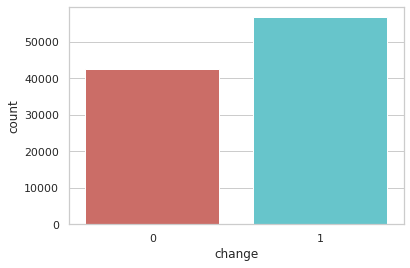

<Figure size 432x288 with 0 Axes>

In [60]:
# exploring the data and creating model. Using a simple log reg since we have a label here. 

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

posts_data.dropna()

print(posts_data.shape)

# exploring data
posts_data.value_counts()
sns.countplot(x='change', data=posts_data, palette='hls')
plt.show()
plt.savefig('count_plot')



In [61]:
count_decrease = len(posts_data[posts_data['change']==0])
count_increase = len(posts_data[posts_data['change']==1])
pct_of_decrease = count_decrease/(count_decrease+count_increase)
print("percentage of stock price decrease is", pct_of_decrease*100)
pct_of_increase = count_increase/(count_decrease+count_increase)
print("percentage of stock price increase is", pct_of_increase*100)

percentage of stock price decrease is 42.80622621372908
percentage of stock price increase is 57.19377378627092


In [62]:
# data is unbalanced, so go ahead to up-sample the -1's. 
posts_data.columns.values

X = posts_data.loc[:, posts_data.columns != 'change']
y = posts_data.loc[:, posts_data.columns == 'change']

print(X.dtypes)
print(y.dtypes)

date                       int64
sentiment                float64
upvote_ratio             float64
total_awards_received    float64
score                    float64
num_comments             float64
change_pct               float64
dtype: object
change    int64
dtype: object


In [63]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=oversampling.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['change'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of decreases in oversampled data",len(os_data_y[os_data_y['change']==0]))
print("Number of increases",len(os_data_y[os_data_y['change']==1]))
print("Proportion of decreases in oversampled data is ",len(os_data_y[os_data_y['change']==0])/len(os_data_X))
print("Proportion of increases in oversampled data is ",len(os_data_y[os_data_y['change']==1])/len(os_data_X))

length of oversampled data is  79396
Number of decreases in oversampled data 39698
Number of increases 39698
Proportion of decreases in oversampled data is  0.5
Proportion of increases in oversampled data is  0.5


In [32]:
# env check utility, ignore if not needed. 

import imblearn; print("imblearn: ", imblearn.__version__)
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

imblearn:  0.8.0
Linux-4.19.104-microsoft-standard-x86_64-with-glibc2.28
Python 3.9.0 (default, Oct  6 2020, 19:10:42) 
[GCC 8.3.0]
NumPy 1.20.2
SciPy 1.6.3
Scikit-Learn 0.24.2


In [45]:
# recursive feature elimination. This is optional, as we have a rather small set of features and we believe all of them are important. 

data_final_vars=posts_data.columns.values.tolist()
y=['change']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/home/yinuo/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


/home/yinuo/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# got LinAlgError: Singular matrix error, so attempt to drop some features and test
cols = ['sentiment', 'score', 'upvote_ratio', 'num_comments']
X=os_data_X[cols]
y=os_data_y['change']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.693100
         Iterations 4
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: change           AIC:              110066.7424
Date:               2021-05-04 20:45 BIC:              110103.8712
No. Observations:   79396            Log-Likelihood:   -55029.    
Df Model:           3                LL-Null:          -55033.    
Df Residuals:       79392            LLR p-value:      0.057952   
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     4.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
sentiment      -0.0005    0.0028  -0.1856  0.8527  -0.0059   0.0049
score          -0.0000    0.0000  -2.3036  0.0212

In [56]:
# the p-value for the variable score is < 0.05, so we will only keep this variable
cols = ['score', 'sentiment']
X=os_data_X[cols]
y=os_data_y['change']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.693102
         Iterations 4
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: change           AIC:              110062.9870
Date:               2021-05-04 20:46 BIC:              110081.5514
No. Observations:   79396            Log-Likelihood:   -55029.    
Df Model:           1                LL-Null:          -55033.    
Df Residuals:       79394            LLR p-value:      0.0071293  
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     4.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
score          -0.0000    0.0000  -2.5371  0.0112  -0.0000  -0.0000
sentiment      -0.0010    0.0024  -0.4157  0.6776

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# it doesn't seem like from Reddit post scores we can tell much. Then we go anothe route to explore the data. 

Accuracy of logistic regression classifier on test set: 0.50
[[11807    38]
 [11937    37]]
